In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
from statsmodels.stats.weightstats import ztest as ztest


sns.set(style='whitegrid', palette = 'Set2')
pd.set_option('display.float_format',  '{:.2f}'.format)

In [2]:
insurance = pd.read_csv('insurance.csv')

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Descriptive Statistic

### Rata rata charges perokok dan non perokok

In [4]:
insurance.loc[insurance.smoker == 'yes'].charges.mean(), insurance.loc[insurance.smoker == 'no'].charges.mean()

(32050.23183153285, 8434.268297856199)

<AxesSubplot:xlabel='charges', ylabel='Count'>

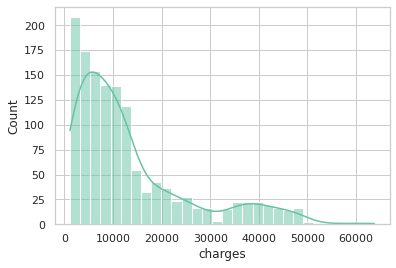

In [5]:
sns.histplot(insurance.charges, kde=True)

In [6]:
insurance.loc[insurance.smoker == 'yes'].charges.median(), insurance.loc[insurance.smoker == 'no'].charges.median()

(34456.348450000005, 7345.4053)

rata-rata charges dari mereka yang merokok (32050.23) jauh lebih mahal dari mereka yang tidak merokok (8434.26) dengan selisih 23615.96

tapi setelah dianalisa lebih jauh, terlihat bahwa charges memiliki distribusi right-skewed, jadi saya memutuskan untuk central tendency menggunakan median.

hasil yang didapat hampir sama yaitu charges dari mereka yang merokok (34456.34) jauh lebih mahal dari mereka yang tidak merokok (7345.40) dengan selisih 27110.94

### Variasi charges perokok dan non perokok

<AxesSubplot:xlabel='charges', ylabel='smoker'>

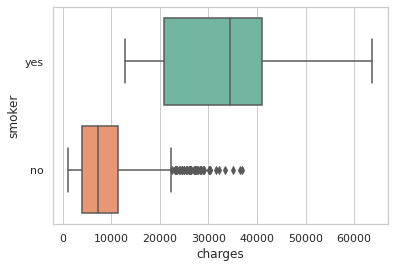

In [7]:
sns.boxplot(data = insurance, x = 'charges', y = 'smoker')

In [8]:
insurance.loc[insurance.smoker == 'yes'].charges.std(), insurance.loc[insurance.smoker == 'no'].charges.std()

(11541.547175589121, 5993.781819194933)

dari barplot diatas dapat dilihat bahwa tagihan dari pengguna yang merokok memang lebih bervariasi daripada yang tidak merokok.

untuk mempermudah, maka variasi akan diubah menjadi standar deviasi. untuk perokok memiliki standar deviasi tagihan di angka 11541.54 dan untuk non perokok 5993.78

### BMI perokok atau non perokok

In [9]:
insurance.loc[insurance.smoker == 'yes'].bmi.max(), insurance.loc[insurance.smoker == 'no'].bmi.max()

(52.58, 53.13)

BMI dari pengguna tidak merokok lebih tinggi daripada BMI pengguna yang merokok

selisih dari BMI tidak terlalu besar, hanya 0.55

### Rata rata nilai BMI yang merokok

In [10]:
insurance.loc[insurance.smoker == 'yes'].bmi.mean(), insurance.loc[insurance.smoker == 'no'].bmi.mean()

(30.708448905109503, 30.651795112781922)

rata-rata BMI dari pengguna tidak merokok lebih tinggi daripada rata-rata BMI pengguna yang merokok

selisih rata rata BMI dari kedua kategori tidak terlalu jauh

### rata rata charges perokok yang bmi > 25 dan charges non perokok yang bmi > 25

In [11]:
bmi_over_25 = insurance.loc[insurance.bmi > 25]

In [12]:
bmi_over_25.loc[bmi_over_25.smoker == 'yes'].charges.mean(), bmi_over_25.loc[bmi_over_25.smoker == 'no'].charges.mean()

(35116.90965694065, 8629.589609712148)

In [13]:
bmi_over_25.loc[bmi_over_25.smoker == 'yes'].charges.median(), bmi_over_25.loc[bmi_over_25.smoker == 'no'].charges.median()

(37270.1512, 7580.89695)

rata rata charges dari perokok dengan BMI > 25 (35116.90) lebih besar daripada yang tidak merokok dengan BMI > 25 (8629.58)

rata rata charges perokok dan tidak perokok (23615.96) dengan charges perokok dan tidak perokok dengan BMI diatas 25 (26487.32) memiliki selisih 2871.36

## Categorical Variable Analysis

### proporsi perokok & non perokok

In [14]:
group_smoker = insurance.groupby(['smoker']).size().reset_index(name='n_pengguna')

In [15]:
group_smoker['p_pengguna'] = group_smoker.n_pengguna / insurance.shape[0]

In [16]:
group_smoker

,smoker,n_pengguna,p_pengguna
0,no,1064,0.80
1,yes,274,0.20


dari tabel diatas, terlihat jelas bahwa dalam dataset asuransi ini terdapat lebih banyak data pengguna yang tidak merokok (80%) daripada pengguna yang merokok (20%) dengan selisih 60%

### Peluang pengguna per gender jika merupakan seorang perokok

In [17]:
is_smoker = insurance.loc[insurance.smoker=='yes']

In [18]:
group_smoker_gender = is_smoker.groupby(['sex']).size().reset_index(name='n_pengguna')

In [19]:
group_smoker_gender['p_pengguna'] = group_smoker_gender.n_pengguna / is_smoker.shape[0]

In [20]:
group_smoker_gender

,sex,n_pengguna,p_pengguna
0,female,115,0.42
1,male,159,0.58


terdapat lebih banyak data pengguna pria yang merokok (58%) daripada pengguna wanita yang merokok (42%) dengan selisih 16%

### tagihan mana yang lebih besar, perempuan atau laki laki?

In [21]:
total_charges = insurance.groupby(['sex']).charges.sum().reset_index(name='total_charges')

In [22]:
total_charges

,sex,total_charges
0,female,8321061.19
1,male,9434763.80


tagihan pengguna pria (9434763.80) jauh lebih besar daripada pengguna wanita (8321061.19) dengan selisih 1113702.61

### apakah proporsi pengguna tiap region sama?

In [23]:
group_region = insurance.groupby(['region']).size().reset_index(name='n_pengguna')

In [24]:
total_pengguna = group_region.n_pengguna.sum()

In [25]:
group_region['p_pengguna'] = group_region.n_pengguna / total_pengguna

In [26]:
group_region

,region,n_pengguna,p_pengguna
0,northeast,324,0.24
1,northwest,325,0.24
2,southeast,364,0.27
3,southwest,325,0.24


<AxesSubplot:xlabel='region', ylabel='p_pengguna'>

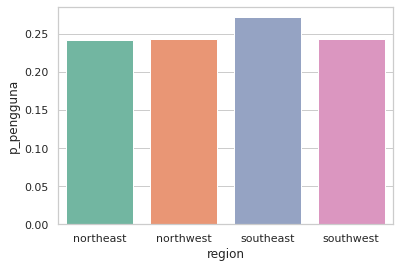

In [27]:
sns.barplot(data=group_region, x='region', y='p_pengguna')

dari keempat region, hanya Region Southeast saja yang memiliki proporsi pengguna 27%

Region lain masing masing di proporsi 24%

### Distribusi peluang tagihan di tiap region

In [28]:
group_region = insurance.groupby(['region']).charges.sum().reset_index(name='total_tagihan')

In [29]:
total_tagihan = group_region.total_tagihan.sum()

In [30]:
group_region['p_tagihan'] = group_region.total_tagihan / sum(group_region.total_tagihan)

In [31]:
group_region

,region,total_tagihan,p_tagihan
0,northeast,4343668.58,0.24
1,northwest,4035712.00,0.23
2,southeast,5363689.76,0.30
3,southwest,4012754.65,0.23


<AxesSubplot:xlabel='region', ylabel='p_tagihan'>

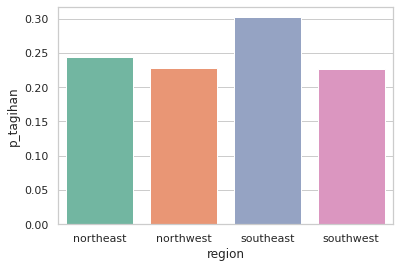

In [32]:
sns.barplot(data=group_region, x='region', y='p_tagihan')

sama seperti analisa proporsi pengguna, nampaknya juga peluang tagihan lebih besar di Region Southeast dengan peluang 30%

region lain hampir sama rata di peluang 23% unuk Region Northwest dan Southwest, kemudian 24% untuk Region Northeast.

## Continous Variable Analysis

In [33]:
is_smoker_bmi_over_25 = insurance.loc[(insurance.smoker == 'yes') & (insurance.bmi >= 25)]
is_nonsmoker_bmi_over_25 = insurance.loc[(insurance.smoker == 'no') & (insurance.bmi >= 25)]

<AxesSubplot:xlabel='charges', ylabel='Count'>

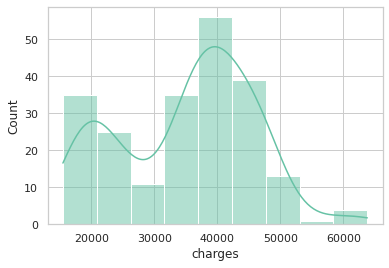

In [34]:
sns.histplot(is_smoker_bmi_over_25.charges, kde=True)

In [35]:
is_smoker_bmi_over_25.charges.mean(), is_smoker_bmi_over_25.charges.std()

(35116.90965694065, 10702.561195352759)

In [36]:
1 - (stat.norm.cdf((16700 - is_smoker_bmi_over_25.charges.mean()) / is_smoker_bmi_over_25.charges.std(), 0, 1))

0.9573559499024568

dengan asumsi distribusi normal, maka probabilitas perokok dengan bmi > 25 akan mendapat tagihan diatas 16.7K adalah 0.95 (dihitung menggunakan mean 35116.90 dan standard deviasi 10702.56)

<AxesSubplot:xlabel='charges', ylabel='Count'>

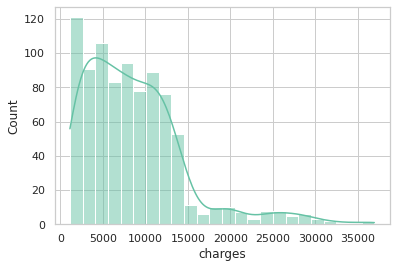

In [37]:
sns.histplot(is_nonsmoker_bmi_over_25.charges, kde=True)

In [38]:
is_nonsmoker_bmi_over_25.charges.mean(), is_nonsmoker_bmi_over_25.charges.std()

(8633.955125479397, 6035.931491029742)

In [39]:
1 - (stat.norm.cdf((16700 - is_nonsmoker_bmi_over_25.charges.mean()) / is_nonsmoker_bmi_over_25.charges.std(), 0, 1))

0.0907194036950052

dengan asumsi distribusi normal, maka probabilitas bukan perokok dengan bmi > 25 akan mendapat tagihan diatas 16.7K adalah 0.09 (dihitung menggunakan mean 8633.85 dan standard deviasi 6035.93)

## Analisa Korelasi Variable

<AxesSubplot:xlabel='bmi', ylabel='charges'>

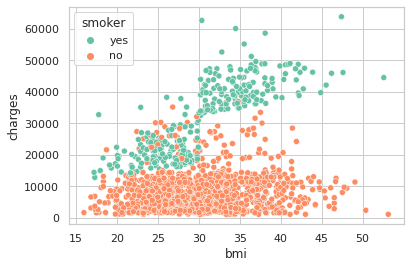

In [40]:
sns.scatterplot(data = insurance, x = 'bmi', y='charges', hue = 'smoker')

In [41]:
is_smoker.corr().charges

age        0.37
bmi        0.81
children   0.04
charges    1.00
Name: charges, dtype: float64

dari Scatterplot diatas terlihat jelas bahwa BMI pengguna yang merokok memiliki korelasi positif cukup besar dengan score 0.81

## Conclusion